In [506]:
# Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling

# Read Data
df = pd.read_csv("BSCY4.csv")

# P-value
alpha = 0.05

# Question 2

MPG follows a normal distribution


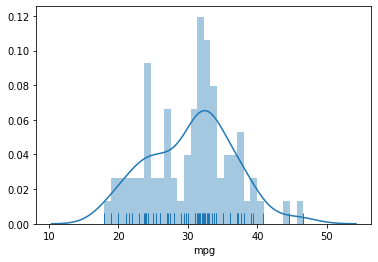

In [509]:
# I used the Shapiro-Wilk method to test whether the data of MPG follows a normal distribution.
# Based on the result below I have proven that MPG does follows a normal distribution.

# Visual representation of MPG
sns.distplot(df['mpg'], kde=True, rug=True, bins =30)

# Shapiro-Wilk Test for 'MPG'
stat, p = shapiro(df['mpg'])
if p > alpha:
    print('MPG follows a normal distribution')
else:
    print('MPG does not follow a normal distribution')

In [518]:
# The MPG can be transformed to make the result normal by removing outliers using Standard Deviation.
mean = np.mean(df['mpg'], axis=0)
sd = np.std(df['mpg'], axis=0)


# Removing Items based on the STD
final_list = [x for x in df['mpg'] if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]

# Question 3

In the data given I perform the Shapiro-Wilk test on all columns and based on the result I can conclude that the columns ('weight' and 'acceleration') are both Normally Distributed. In the cells below I will try to normalise other columns using appropriate methods.

MPG does not follow a normal distribution


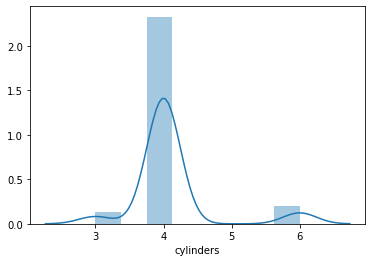

In [520]:
# Visual representation of 'Cylinders'
sns.distplot(df['cylinders'], kde=True)

# Shapiro-Wilk Test for 'Cylinders'
stat, p = shapiro(df['cylinders'])
if p > alpha:
    print('MPG follows a normal distribution')
else:
    print('MPG does not follow a normal distribution')
    
    
# The column Cylinders cannot be transformed since the column only contain 3 unique values.

In [475]:
disp = np.array(df['displacement'])
norm = preprocessing.normalize([disp])

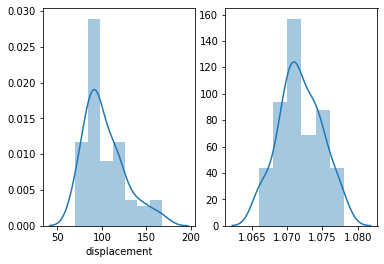

In [522]:
# Transforming 'Displacement'

# We Normalise the exponential data using Boccox
nm = stats.boxcox(df['displacement'])

# Displaying non-normal and normal distribution to see the results
fig, ax = plt.subplots(1,2)
sns.distplot(df['displacement'], ax = ax[0])
sns.distplot(nm[0], ax = ax[1])

In [523]:
# Now we test the normalise data using Shapiro-Wild Test
stat, p = shapiro(nm[0])
if p > alpha:
    print('Displacement follows a normal distribution')
else:
    print('Displacement does not follow a normal distribution')

Displacement follows a normal distribution


Displacement does not follow a normal distribution


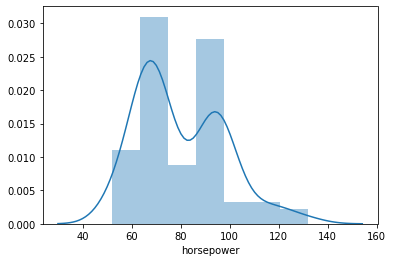

In [536]:
# Transforming 'horsepower'
sns.distplot(df['horsepower'])

stat, p = shapiro(hp[0])
if p > alpha:
    print('Displacement follows a normal distribution')
else:
    print('Displacement does not follow a normal distribution')

# Based on the plot below comes from a normal distribution with one outlier. The data shows its a multimodal distribution.
# It cant be transformed become a normaly distributed unless one peak value is removed

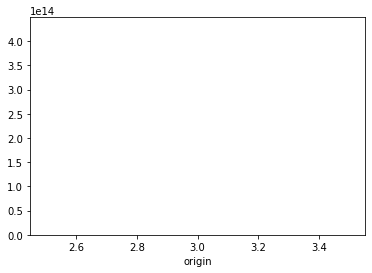

In [538]:
# Diplay 'origin'
sns.distplot(df['origin'])

# origin only has one unique value therefore there is no transformation that can be done
# Also the 'car name' column is are strings which cant be asses

# Question 4

Which	of	numerical	Cields	satisfy	the	assumptions	of	regression	analysis?

In [568]:
# I wrote a method which test if the null hypothesis of two variables are independant. 
# I results returns 'Independet' we will use them in the regrssion analysis
def assuptionTest(col1, col2):
    # Get the test results
    p = stats.chi2_contingency(pd.crosstab(index=df[col1], columns=df[col2]))[1]

    # message
    if p > 0.05:
        print(col1," and ", col2, " are: Independent")
    else: 
        print(col1," and ", col2, " are: Dependent")

In [570]:
# The variables that returned 'Independent' will be used in the regrssion analysis
assuptionTest('mpg','weight')
assuptionTest('weight','acceleration')
assuptionTest('mpg','acceleration')

mpg  and  weight  are: Independent
weight  and  acceleration  are: Independent
mpg  and  acceleration  are: Dependent


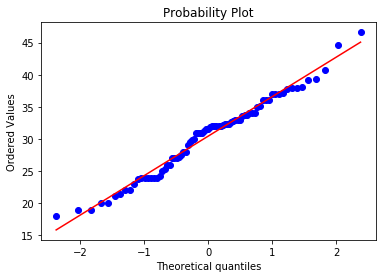

In [555]:
stats.probplot(df['mpg'], dist="norm", plot=plt)
plt.show()